Q1

256


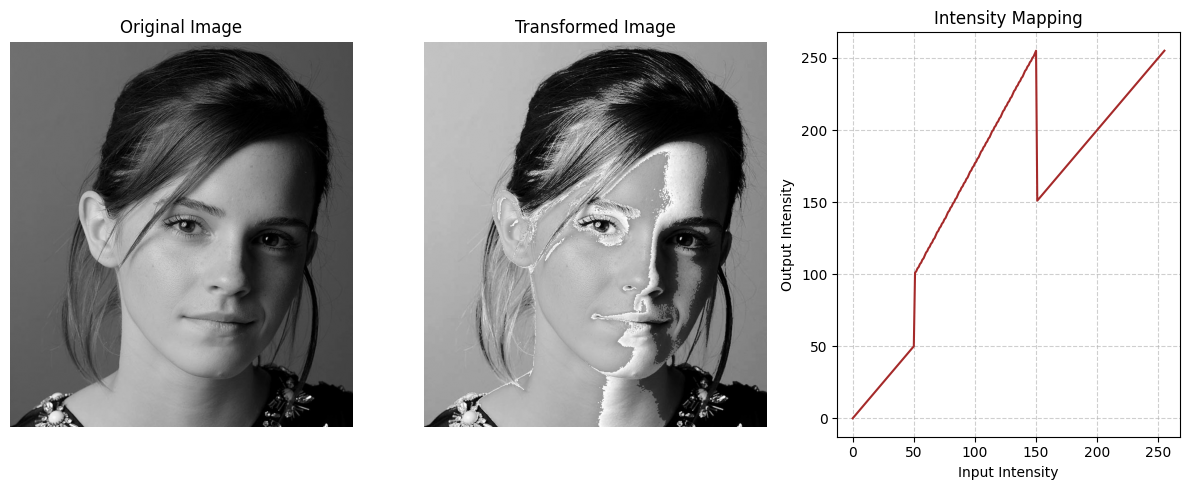

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,100),(150,255)])

t1 = np.linspace(0, c[0,0], c[0,0] +1).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0]+1, 255, 255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

img_org = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_org, transform)


# Plot results
plt.figure(figsize=(12,5))

# Original image
plt.subplot(1,3,1)
plt.imshow(img_org, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Transformed image
plt.subplot(1,3,2)
plt.imshow(image_transformed, cmap="gray")
plt.title("Transformed Image")
plt.axis("off")

# Transformation curve
plt.subplot(1,3,3)
plt.plot(np.arange(256), transform, color="brown")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Intensity Mapping")

plt.tight_layout()
plt.show()

Q2



256


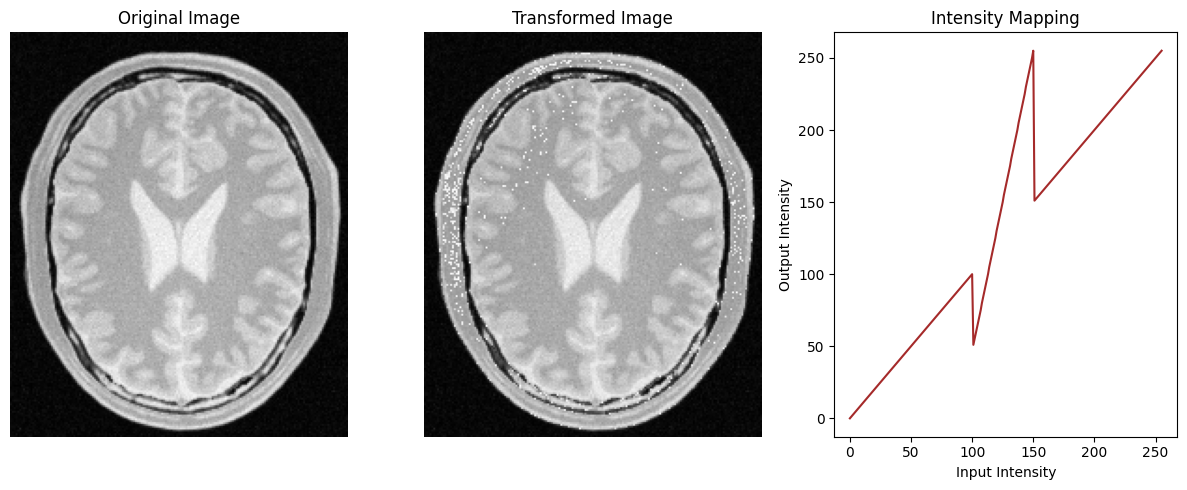

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,50),(150,255)])

t1 = np.linspace(0, c[0,0], c[0,0] +1).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0]+1, 255, 255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2,t3), axis=0).astype('uint8')
# transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

img_org = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_org, transform)


# Plot results
plt.figure(figsize=(12,5))

# Original image
plt.subplot(1,3,1)
plt.imshow(img_org, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Transformed image
plt.subplot(1,3,2)
plt.imshow(image_transformed, cmap="gray")
plt.title("Transformed Image")
plt.axis("off")

# Transformation curve
plt.subplot(1,3,3)
plt.plot(np.arange(256), transform, color="brown")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Intensity Mapping")

plt.tight_layout()
plt.show()

Q3

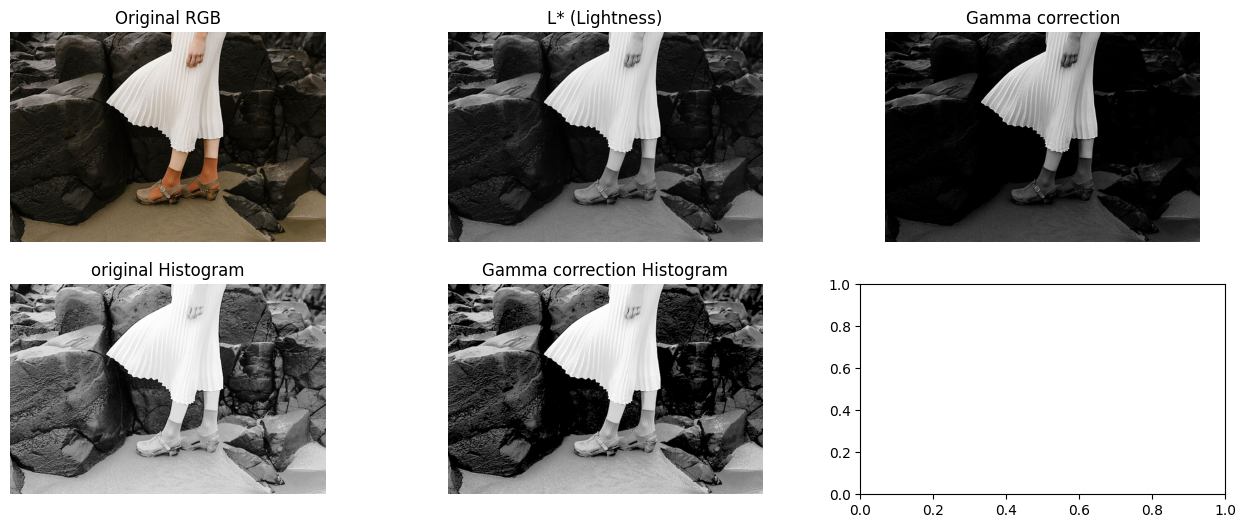

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv.imread("highlights_and_shadows.jpg")   # replace with your image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert BGR → RGB for display

# Convert to LAB
lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
L, a, b = cv.split(lab)

gamma = 2
t = np.array([((i / 255)**gamma)*255 for i in range(0,256)]).astype(np.uint8)
g = t[L]

g_histo = cv.equalizeHist(g)
ori_histo = cv.equalizeHist(L)
# Plot original and LAB planes
fig, axes = plt.subplots(2, 3, figsize=(16, 6))

axes[0,0].imshow(img)
axes[0,0].set_title("Original RGB")
axes[0,0].axis("off")

axes[0,1].imshow(L, cmap="gray")
axes[0,1].set_title("L* (Lightness)")
axes[0,1].axis("off")

axes[0,2].imshow(g, cmap="gray")
axes[0,2].set_title("Gamma correction")
axes[0,2].axis("off")

axes[1,0].imshow(ori_histo, cmap="gray")
axes[1,0].set_title("original Histogram")
axes[1,0].axis("off")

axes[1,1].imshow(g_histo, cmap="gray")
axes[1,1].set_title("Gamma correction Histogram")
axes[1,1].axis("off")

plt.show()


Q4

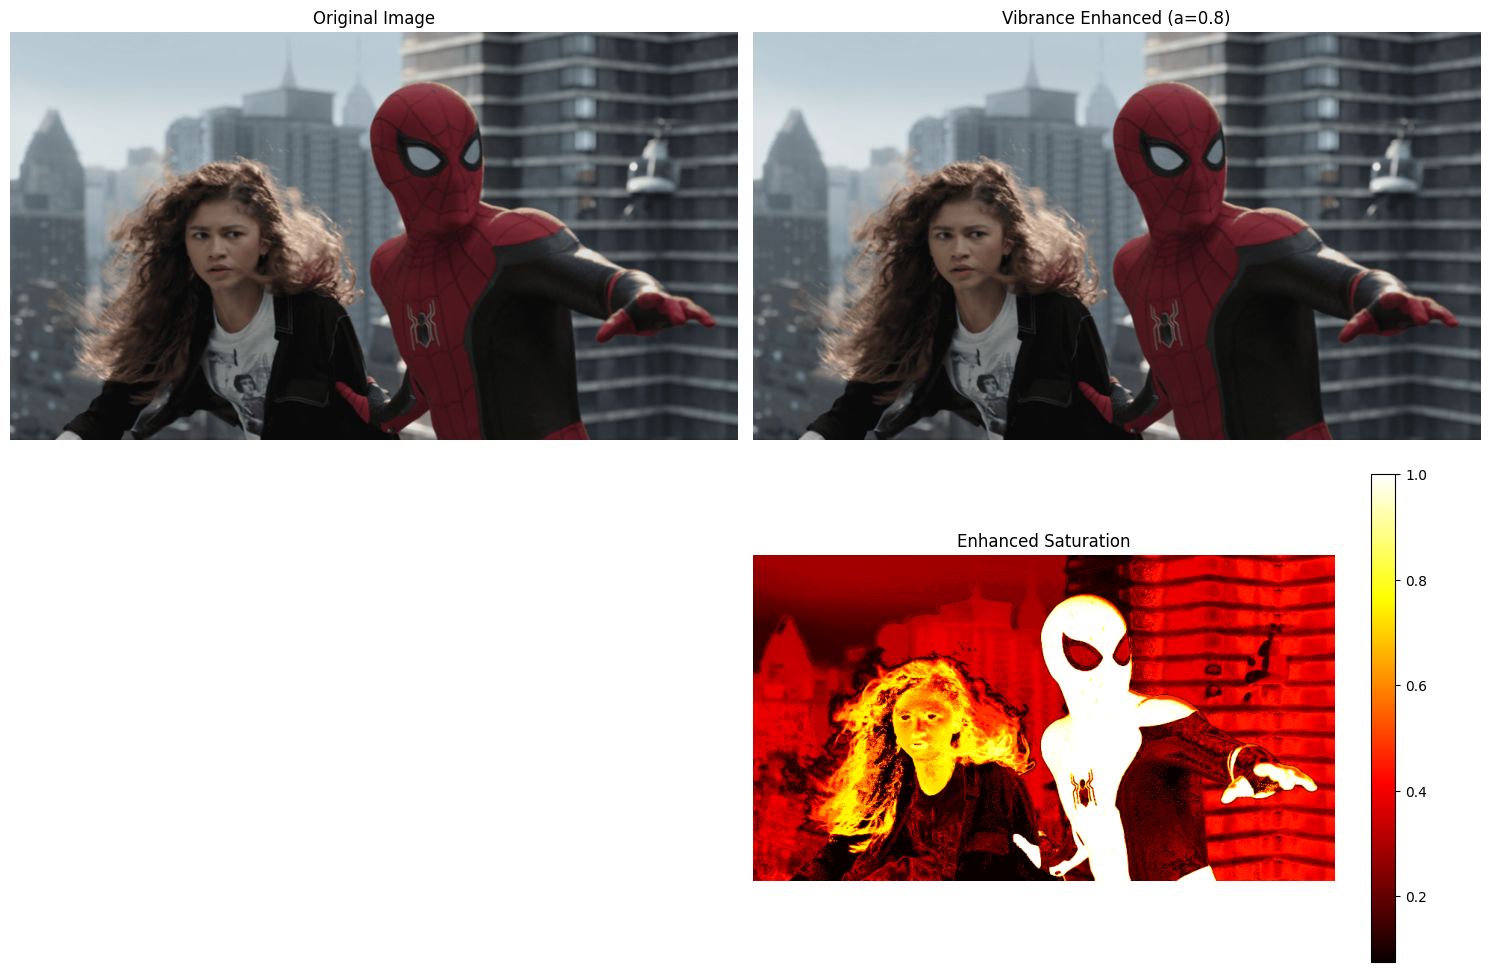

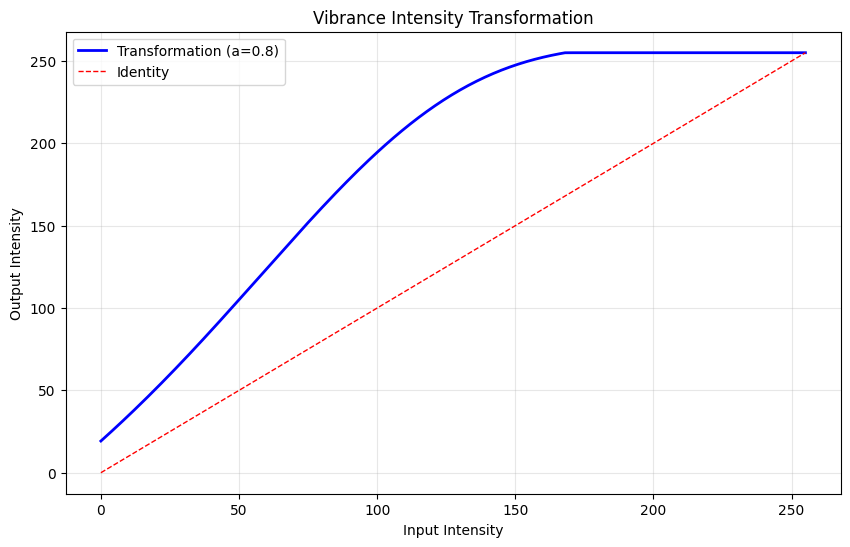

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage import color
import os

img = cv2.imread("spider.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to HSV color space
img_hsv = color.rgb2hsv(img_rgb)

# Split into H, S, V channels
hue = img_hsv[:, :, 0]
saturation = img_hsv[:, :, 1]
value = img_hsv[:, :, 2]

optimal_a = 0.8
sigma=70
enhanced_saturation = np.zeros_like(saturation)

    # Apply transformation pixel by pixel
for i in range(saturation.shape[0]):
    for j in range(saturation.shape[1]):
        x = saturation[i, j] * 255  # Convert to 0-255 range
        # Apply transformation
        transformed = x + optimal_a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
        # Clip to valid range
        enhanced_saturation[i, j] = min(transformed, 255) / 255

hsv_image = np.stack([hue, saturation, value], axis=2)
# Convert back to RGB
rgb_image = color.hsv2rgb(hsv_image)
# Convert to 0-255 range and uint8
rgb_image = (rgb_image * 255).astype(np.uint8)

plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb )
plt.title('Original Image')
plt.axis('off')

# Enhanced image
plt.subplot(2, 2, 2)
plt.imshow(rgb_image)
plt.title(f'Vibrance Enhanced (a={optimal_a})')
plt.axis('off')

# Saturation comparison
# plt.subplot(2, 2, 3)
# plt.imshow(saturation, cmap='hot')
# plt.title('Original Saturation')
# plt.axis('off')
# plt.colorbar()

plt.subplot(2, 2, 4)
plt.imshow(enhanced_saturation, cmap='hot')
plt.title('Enhanced Saturation')
plt.axis('off')
plt.colorbar()

plt.tight_layout()
plt.show()

x = np.linspace(0, 255, 256)
y = [min(x_val + optimal_a * 128 * np.exp(-((x_val - 128) ** 2) / (2 * sigma ** 2)), 255)
    for x_val in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label=f'Transformation (a={optimal_a})')
plt.plot(x, x, 'r--', linewidth=1, label='Identity')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Vibrance Intensity Transformation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
